## Heart Risk Prediction with Kaggle's Dataset

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in 
the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases
can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends 
to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town
 of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 


Demographic [ Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors. ] :

  • Sex: male or female(Nominal).

  • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
  Behavioral.

  • Current Smoker: whether or not the patient is a current smoker (Nominal)

  • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can  
      have any number of cigarettes, even half a cigarette.) Medical( history)

  • BP Meds: whether or not the patient was on blood pressure medication (Nominal)

  • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

  • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

  • Diabetes: whether or not the patient had diabetes (Nominal) , Medical(current)

  • Tot Chol: total cholesterol level (Continuous)

  • Sys BP: systolic blood pressure (Continuous)

  • Dia BP: diastolic blood pressure (Continuous)

  • BMI: Body Mass Index (Continuous)

  • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet 
             are considered continuous because of large number of possible values.)

  • Glucose: glucose level (Continuous)

  Predict variable (desired target)
  
  • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/framingham.csv')

# print(data.sample(5) , end='\n')
print(data.info())

# print(data.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [2]:
print(data.sample(5))

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
38       0   42        1.0              1         1.0     0.0   
1348     1   42        4.0              0         0.0     0.0   
3726     0   56        3.0              1         1.0     0.0   
1082     0   49        2.0              1        30.0     0.0   
3235     0   51        3.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
38                  0             1         0    233.0  153.0  101.0  28.93   
1348                0             0         0    225.0  110.0   73.0  27.67   
3726                0             1         0    260.0  120.0   84.0  36.18   
1082                0             0         0    265.0  144.0   86.0  25.57   
3235                0             0         0    204.0  119.0   80.0  24.03   

      heartRate  glucose  TenYearCHD  
38         60.0     90.0           0  
1348       65.0     65.0           0  
3726       80.0  

In [3]:
print(data.describe().transpose())

                  count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   
BMI              4219.0   25.802008   4.080111   15

<Axes: xlabel='TenYearCHD', ylabel='age'>

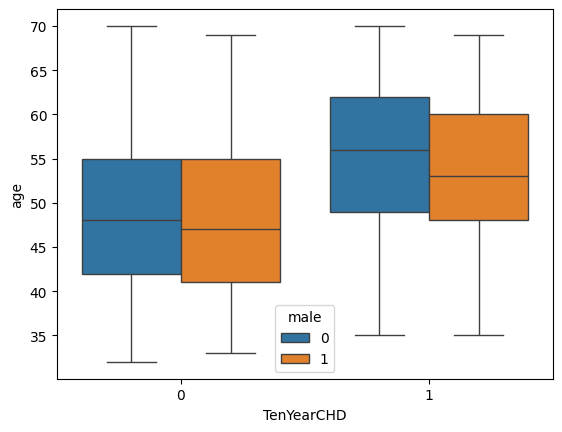

In [4]:
# Determining the age group for CHD for both genders...
sns.boxplot(x='TenYearCHD' , y='age' ,  data=data , hue='male')

education         -0.054059
currentSmoker      0.019456
heartRate          0.022913
cigsPerDay         0.057884
prevalentStroke    0.061810
BMI                0.075192
totChol            0.082184
BPMeds             0.087489
male               0.088428
diabetes           0.097317
glucose            0.125544
diaBP              0.145299
prevalentHyp       0.177603
sysBP              0.216429
age                0.225256
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


<Axes: >

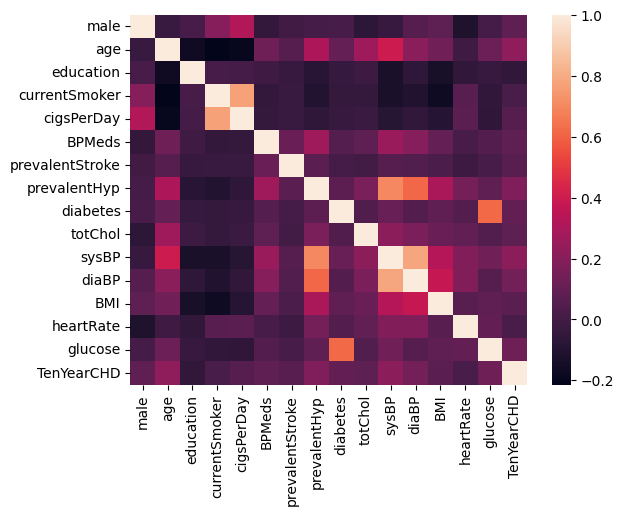

In [5]:
# Determining the correlation of all features to each other...
print(data.corr()['TenYearCHD'].sort_values())
sns.heatmap(data=data.corr() )

In [6]:
# 'education' feature having no impact on CHD so dropping it , Correlation value : -0.054059
data = data.drop('education' , axis=1)

In [7]:
# checking for Null values
print(data.isna().sum()) # 540 missing values found

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


- Imputing the missing values with suitable imputation

In [8]:
data = data.dropna(subset=['heartRate']) # Only one missing value so dropping doesn't cost much
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())  # Mean imputation for glucose
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])  # Mode imputation for BPMeds
data['totChol'] = data['totChol'].fillna(data['totChol'].median())  # Median imputation for totChol
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())  # Median imputation for cigsPerDay
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())  # Mean imputation for BMI

In [9]:
X = data.drop('TenYearCHD' , axis=1)
y = data['TenYearCHD']

- Checking for imbalance

TenYearCHD
0    3594
1     643
Name: count, dtype: int64


<Axes: ylabel='count'>

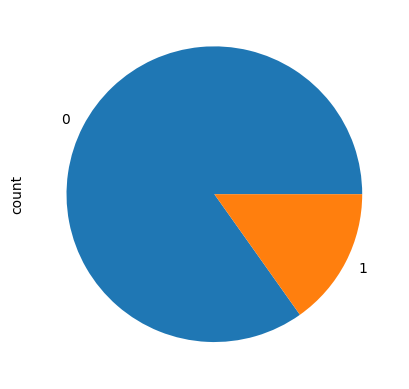

In [10]:
print(y.value_counts()) # Imbalance of classes Detected
y.value_counts().plot.pie() # pandas in-built function to visualize a pie-chart

- Defining train-test split and Scaling the Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


X_train, X_test, y_train, y_test = train_test_split(X , y ,  test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

- Resampling the Data

In [12]:
from imblearn.over_sampling import RandomOverSampler # for balanced sampling

re_sampler = RandomOverSampler(random_state=42)
re_X , re_y = re_sampler.fit_resample(X_train , y_train)

- Suppressing Warnings

In [13]:
import warnings
warnings.filterwarnings("ignore", message="l1_ratio parameter is only used when penalty is 'elasticnet'")

- Making a Logistic Regression Model

In [14]:
from sklearn.multiclass import OneVsRestClassifier # using this because 'ovr' parameter for LogisticRegression() is depricated
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Model =  OneVsRestClassifier(LogisticRegression(solver='saga' , max_iter=5000))

params_grid = {
    'estimator__penalty' : ['l1' , 'l2' , 'elasticnet'],
    'estimator__C': [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ], 
    'estimator__l1_ratio': [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ]
}

GridSearch_Log_Model = GridSearchCV(estimator=Model , param_grid=params_grid , cv=10)
GridSearch_Log_Model.fit(re_X , re_y)

print(GridSearch_Log_Model.best_params_)

{'estimator__C': 0.2, 'estimator__l1_ratio': 0.1, 'estimator__penalty': 'l1'}


- Testing with Test-Set

In [15]:
from sklearn.metrics import confusion_matrix  ,classification_report

y_pred = GridSearch_Log_Model.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[721 347]
 [ 71 133]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1068
           1       0.28      0.65      0.39       204

    accuracy                           0.67      1272
   macro avg       0.59      0.66      0.58      1272
weighted avg       0.81      0.67      0.71      1272



- Trying with KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

params_grid = {
    'n_neighbors': [x for x in range(1 , 31)],
}

GridSearch_KNN_Model = GridSearchCV(estimator=KNeighborsClassifier() , param_grid=params_grid , cv=10)
GridSearch_KNN_Model.fit(re_X , re_y)

print(GridSearch_KNN_Model.best_params_)

{'n_neighbors': 1}


c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


- Testing with Test-Set for KNN

In [17]:
y_pred = GridSearch_KNN_Model.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[960 108]
 [157  47]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1068
           1       0.30      0.23      0.26       204

    accuracy                           0.79      1272
   macro avg       0.58      0.56      0.57      1272
weighted avg       0.77      0.79      0.78      1272



- Trying with Support Vector Classifier

In [18]:
from sklearn.svm import SVC

params_grid = {
    'C': [0.1 , 0.2 , 0.3 , 0.4 , 0.5],
    'kernel':['linear' , 'rbf'],
    'gamma':[0.1 , 0.2 , 0.3 , 0.4 , 0.5]
}

GridSearch_KNN_Model = GridSearchCV(estimator=SVC() , param_grid=params_grid , cv=10)
GridSearch_KNN_Model.fit(re_X , re_y)

print(GridSearch_KNN_Model.best_params_)

{'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}


- Testing with Test-Set for Support Vector Classifier

In [19]:
y_pred = GridSearch_KNN_Model.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[941 127]
 [161  43]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1068
           1       0.25      0.21      0.23       204

    accuracy                           0.77      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.76      0.77      0.77      1272



For now KNN is the better model on this dataset. Other models are unsuccessful due to the fact that data itself is unbalanced

0  :   3594

1  :   643